In [1]:
import pandas as pd
import numpy as np

new_df = pd.read_csv('/home/kawaleenm/Documents/Medical Brazil/Med Appointments.csv',low_memory = False)

In [3]:
print(new_df['Gender'].value_counts())

F    71840
M    38687
Name: Gender, dtype: int64


In [2]:
new_df['Gender'] = new_df.Gender.replace(['M', 'F'], [1, 0])

In [3]:
new_df['No-show'] = new_df['No-show'].replace(['Yes', 'No'], [1, 0])

In [4]:
new_df['AppointmentDay'] = pd.to_datetime(new_df.AppointmentDay)
new_df['ScheduledDay'] = pd.to_datetime(new_df.ScheduledDay)

In [5]:
new_df['Days_Before_Appointment'] = new_df.AppointmentDay.dt.date - new_df.ScheduledDay.dt.date 

In [6]:
female = new_df['Gender']== 0
male = new_df['Gender'] == 1
no_show = new_df['No-show'] == 1

total_female = new_df.loc[female,'Gender'].count()
no_female = new_df.loc[female & no_show,'No-show'].count()

total_male = new_df.loc[male,'Gender'].count()
no_male = new_df.loc[male & no_show,'No-show'].count()

per_no_female = (no_female/total_female)*100
per_no_male = (no_male/total_male)*100

In [7]:
print('Total Female: {}'.format(total_female))
print('Total Female where No Show is True: {}'.format(no_female))
print('Percent of Females dont turn for Appointment: {:.2f}\n'.format(per_no_female))

print('Total Male: {}'.format(total_male))
print('Total Male where No Show is True: {}'.format(no_male))
print('Percent of Males dont turn for Appointment: {:.2f}\n'.format(per_no_male))

print('The percentage of Male and Female not turning up for the Appointment is Almost Equal. Hence Gender does not effect the No-Show')

Total Female: 71840
Total Female where No Show is True: 14594
Percent of Females dont turn for Appointment: 20.31

Total Male: 38687
Total Male where No Show is True: 7725
Percent of Males dont turn for Appointment: 19.97

The percentage of Male and Female not turning up for the Appointment is Almost Equal. Hence Gender does not effect the No-Show


In [8]:
new_df['Days_Before_Appointment'] = abs(new_df['Days_Before_Appointment'])
new_df['Days_Before_Appointment'] = new_df.Days_Before_Appointment.astype('str')

In [9]:
import re

def day_str(x):
    m = re.sub('\s[a-zA-Z0-9:-]*','',x)
    return m

new_df.Days_Before_Appointment = new_df.Days_Before_Appointment.apply(day_str)

In [10]:
new_df['Days_Before_Appointment'] = new_df.Days_Before_Appointment.astype('float')

In [13]:
appointments = new_df.loc[:,'Days_Before_Appointment']
days_no_shows = new_df.loc[new_df['No-show']==1,'Days_Before_Appointment']

In [14]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

fig=plt.figure(figsize=(12, 10))

plt.hist(appointments,bins = 120,histtype='bar',label='No. of Appointments',alpha = 1)
plt.xlim(-1,120)
plt.xticks([x for x in range(121) if x%5==0])
plt.xlabel('Days')
plt.ylabel('Appointments')
plt.title('Scheduled Days Vs Before No.of Appointments')
plt.legend(fontsize = 20)
plt.show

print('''Appointments represent the Number of Appointments made on each day and Days represent the Difference in the Number of Days between Appointment Date and Scheduling an Appointment.''')

Appointments represent the Number of Appointments made on each day and Days represent the Difference in the Number of Days between Appointment Date and Scheduling an Appointment.


Y axis represent the Number of Appointments that didn't Show on each day and X axis represent the Difference in the Number of Days between Appointment Date and Scheduling an Appointment.


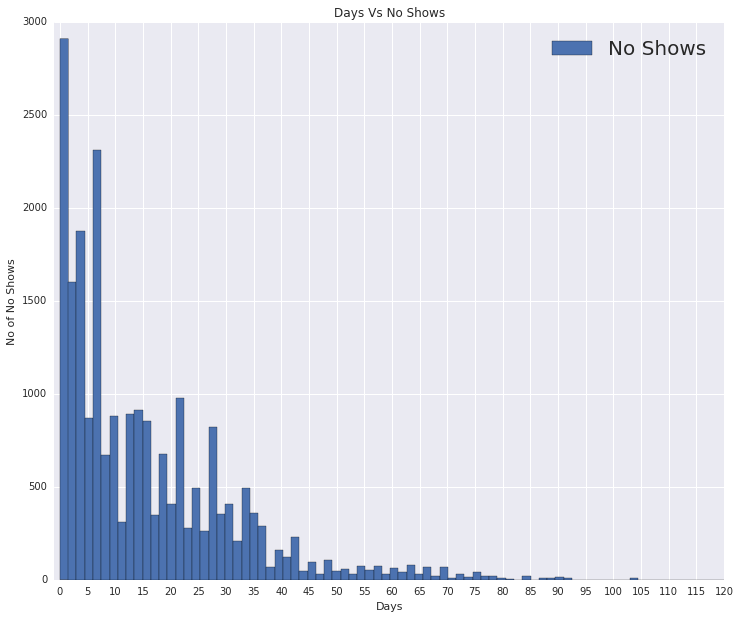

In [138]:
%matplotlib inline

fig=plt.figure(figsize=(12, 10))

plt.hist(days_no_shows,bins = 120,label='No Shows')
plt.xlim(-1,120)
plt.xticks([x for x in range(121) if x%5==0])
plt.xlabel('Days')
plt.ylabel('No of No Shows')
plt.title('Days Vs No Shows')
plt.legend(fontsize = 20)
plt.show

print('''Y axis represent the Number of Appointments that didn't Show on each day and X axis represent the Difference in the Number of Days between Appointment Date and Scheduling an Appointment.''')

<function matplotlib.pyplot.show>

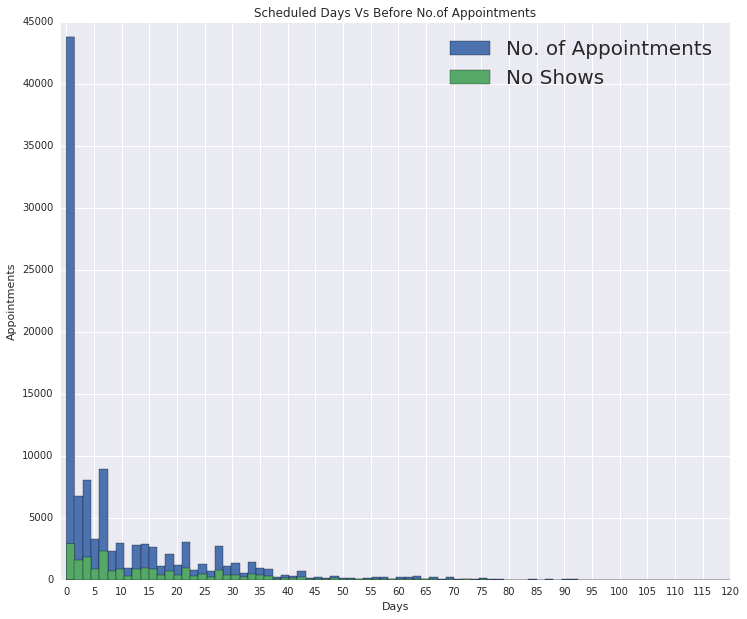

In [156]:
fig=plt.figure(figsize=(12, 10))

plt.hist(appointments,bins = 120,histtype='bar',label='No. of Appointments',alpha = 1)
plt.hist(days_no_shows,bins = 120,label='No Shows')
plt.xlim(-1,120)
plt.xticks([x for x in range(121) if x%5==0])
plt.xlabel('Days')
plt.ylabel('Appointments')
plt.title('Scheduled Days Vs Before No.of Appointments')
plt.legend(fontsize = 20)
plt.show

print()

In [265]:
neighbour = new_df.loc[:,['Neighbourhood','No-show']]

no_show_groupby = neighbour.groupby(['Neighbourhood','No-show']).count()

In [256]:
# Names of Neighbourhood
neighbour_name = list(neighbour.Neighbourhood.unique())

#No of Appointments in each neighbourhood that did not turn up
neighbour_noshow = neighbour.loc[neighbour['No-show'] == 1,['Neighbourhood','No-show']]

# Total Number of Appointments in each neighbourhood
neighbour_count_dict = dict(neighbour.groupby('Neighbourhood').count())
neighbour_count_list = []
for a,b in dict(neighbour_count_dict).items():
    for m,n in b.items():
        neighbour_count_list.append(n)

# Total Number of Appointments didn't turn up
neighbour_noshow_dict = dict(neighbour_noshow.groupby('Neighbourhood').count())
neighbour_noshow_list = []
for a,b in dict(neighbour_noshow_dict).items():
    for m,n in b.items():
        neighbour_noshow_list.append(n)        
        


In [273]:
neighbour_noshow_unique_names = list(neighbour_noshow.Neighbourhood.unique())

In [293]:
neigh = set(neighbour_name) - set(neighbour_noshow_unique_names)

neigh

{'PARQUE INDUSTRIAL'}

In [294]:
neighbour_name.index('PARQUE INDUSTRIAL')

80

In [ ]:
del neighbour_count_list[80]

In [296]:
del neighbour_name[80]

In [295]:
for x in neigh:
    neigh_ = x
    
print('All Aappointments Turned Up at {} Neighbourhood '.format(neigh_))

All Aappointments Turned Up at PARQUE INDUSTRIAL Neighbourhood 


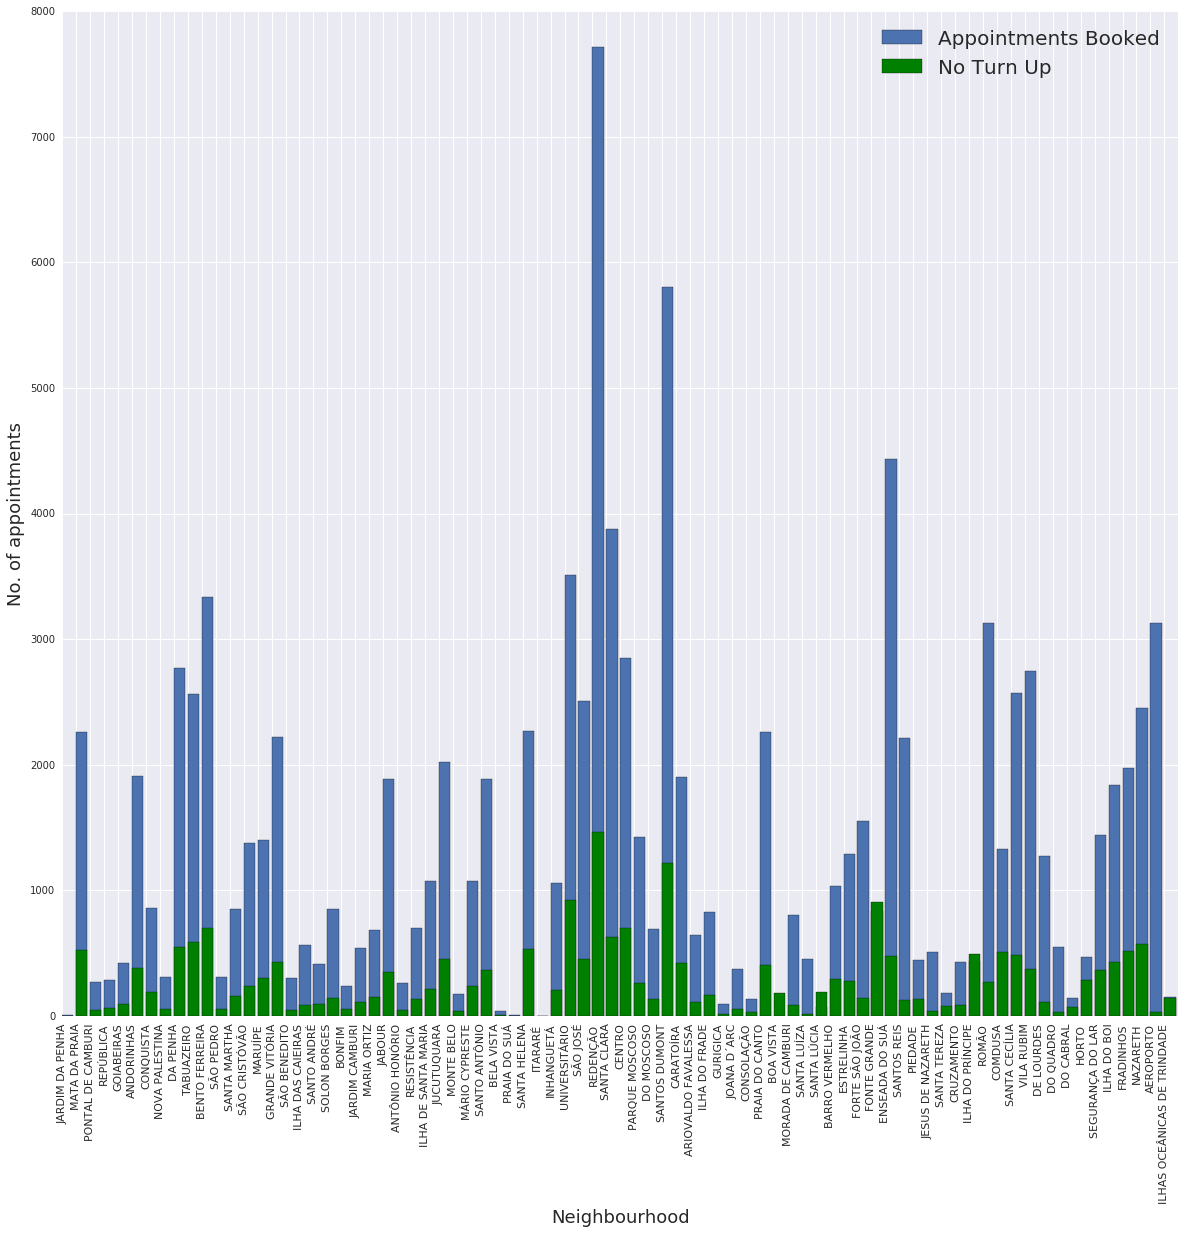

In [326]:
xaxis = [x for x in range(len(neighbour_count_list))]

fig,ax = plt.subplots(figsize=(20, 18))
ax.bar(xaxis,neighbour_count_list,label ='Appointments Booked' )

ax.bar(xaxis,neighbour_noshow_list,label ='No Turn Up',color ='g')

#ax.set_xlabel('common xlabel')
ax.set_ylabel('No. of appointments', fontsize=18)

ax.set_xlabel('Neighbourhood', fontsize=18)



ax.set_xticks(xaxis)
ax.set_xticklabels(neighbour_name, rotation='vertical', fontsize=11)
ax.legend(fontsize = 20)

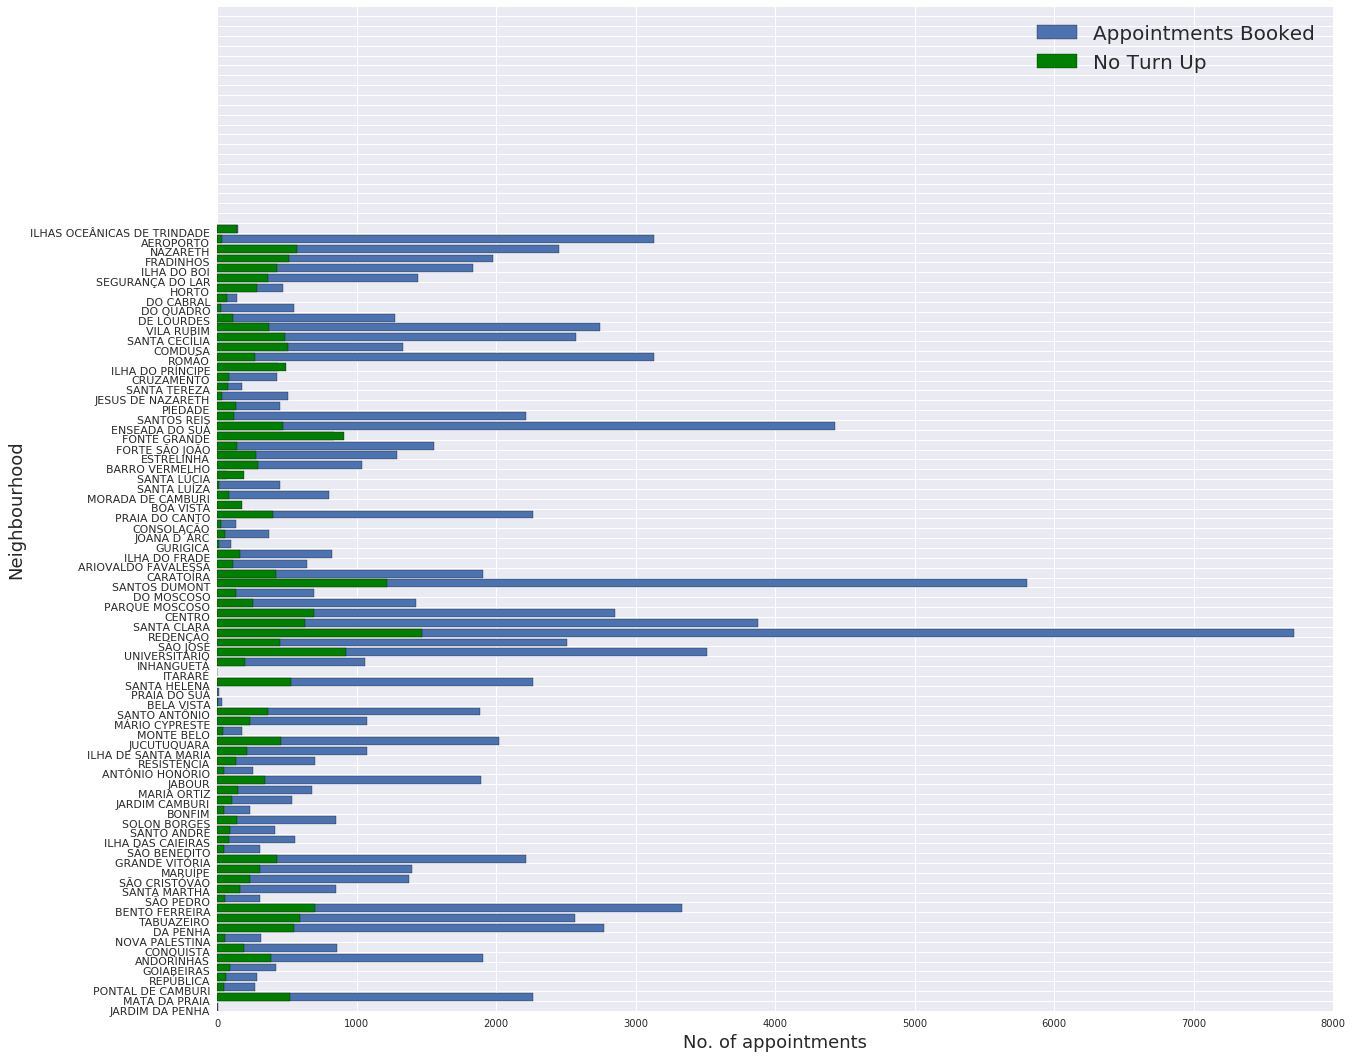

In [375]:
x1axis = [x for x in range(len(neighbour_count_list))]

fig,ax = plt.subplots(figsize=(20, 18))
ax.barh(x1axis,neighbour_count_list,label ='Appointments Booked' )

ax.barh(x1axis,neighbour_noshow_list,label ='No Turn Up',color ='g')

#ax.set_xlabel('common xlabel')
ax.set_ylabel('Neighbourhood', fontsize=18)

ax.set_xlabel('No. of appointments', fontsize=18)


ax.set_yticks(xaxis)
ax.set_yticklabels(neighbour_name, fontsize=11)
ax.legend(fontsize = 20)


In [311]:
neighbour_perc = []

for t,c in zip(neighbour_count_list, neighbour_noshow_list):
    percentage = (c/t)*100
    if percentage > 100:
        percentage = 100
    neighbour_perc.append(percentage)

In [310]:
len(neighbour_noshow_list)

80

In [320]:
print('{:15} {}\n'.format('Neighbourhood','No Show Up'))

for name,per in zip(neighbour_name,neighbour_perc):
    print('{:15.15s} : {:.2f}%'.format(name,per))

Neighbourhood   No Show Up

JARDIM DA PENHA : 12.50%
MATA DA PRAIA   : 23.03%
PONTAL DE CAMBU : 18.45%
REPÚBLICA       : 21.99%
GOIABEIRAS      : 21.51%
ANDORINHAS      : 20.14%
CONQUISTA       : 22.49%
NOVA PALESTINA  : 18.59%
DA PENHA        : 19.83%
TABUAZEIRO      : 23.04%
BENTO FERREIRA  : 21.09%
SÃO PEDRO       : 18.06%
SANTA MARTHA    : 18.85%
SÃO CRISTÓVÃO   : 17.22%
MARUÍPE         : 21.75%
GRANDE VITÓRIA  : 19.35%
SÃO BENEDITO    : 15.41%
ILHA DAS CAIEIR : 15.71%
SANTO ANDRÉ     : 22.28%
SOLON BORGES    : 16.49%
BONFIM          : 22.13%
JARDIM CAMBURI  : 19.70%
MARIA ORTIZ     : 21.85%
JABOUR          : 18.32%
ANTÔNIO HONÓRIO : 18.60%
RESISTÊNCIA     : 19.57%
ILHA DE SANTA M : 20.26%
JUCUTUQUARA     : 22.60%
MONTE BELO      : 24.00%
MÁRIO CYPRESTE  : 21.94%
SANTO ANTÔNIO   : 19.15%
BELA VISTA      : 8.57%
PRAIA DO SUÁ    : 20.00%
SANTA HELENA    : 23.48%
ITARARÉ         : 100.00%
INHANGUETÁ      : 19.11%
UNIVERSITÁRIO   : 26.27%
SÃO JOSÉ        : 17.98%
REDENÇÃO        : 18.9

In [334]:
Age = new_df.loc[new_df.Age >= 0,['Age','No-show']]

In [346]:
age_count_dict = dict(Age.groupby('Age').count())

In [343]:
age_name = sorted(Age.Age.unique())

In [347]:
age_count_list = []

for a,b in age_count_dict.items():
    for m,n in b.items():
        age_count_list.append(n)

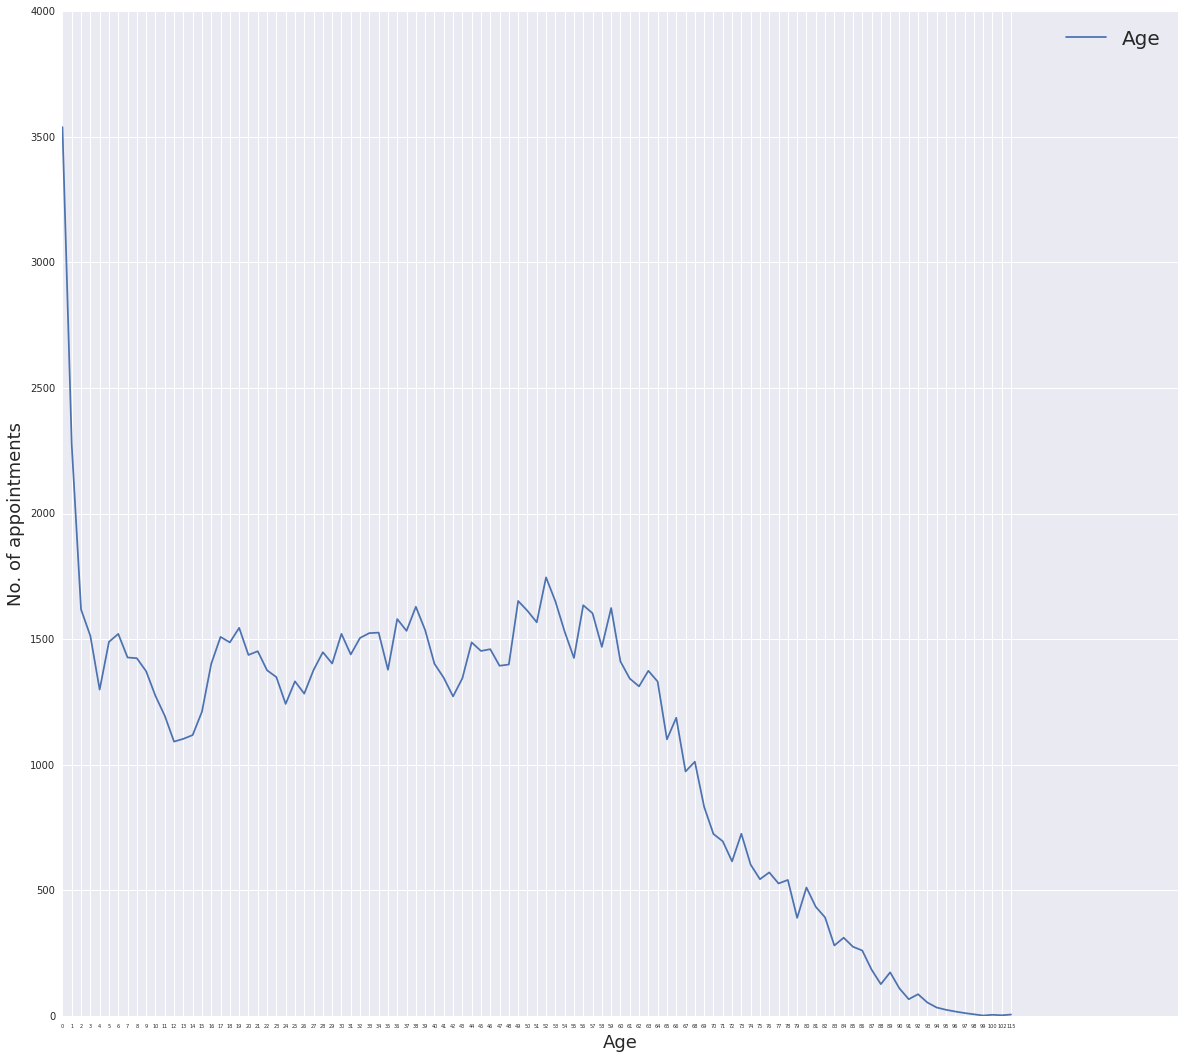

In [362]:
xaxis = [x for x in range(len(age_count_list))]

fig,ax = plt.subplots(figsize=(20, 18))
ax.plot(xaxis,age_count_list,label ='Age' )

#ax.bar(xaxis,neighbour_noshow_list,label ='No Turn Up',color ='g')

#ax.set_xlabel('common xlabel')
ax.set_ylabel('No. of appointments', fontsize=18)

ax.set_xlabel('Age', fontsize=18)

ax.set_xticks(xaxis)
ax.set_xticklabels(age_name, fontsize=5)
ax.legend(fontsize = 20)

<function matplotlib.pyplot.show>

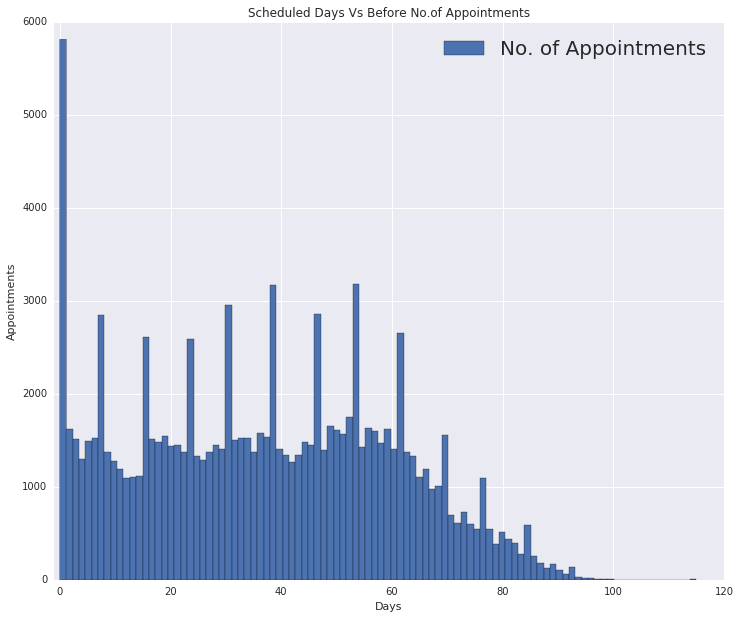

In [370]:
age_1 = Age.loc[:,'Age']

fig=plt.figure(figsize=(12, 10))

plt.hist(age_1,bins = 100,histtype='bar',label='No. of Appointments',alpha = 1)
#plt.hist(days_no_shows,bins = 120,label='No Shows')
plt.xlim(-1,120)
# plt.xticks([x for x in range(100) if x%5==0])
plt.xlabel('Days')
plt.ylabel('Appointments')
plt.title('Scheduled Days Vs Before No.of Appointments')
plt.legend(fontsize = 20)
plt.show

In [364]:
len(age_count_list)

103